# Project: Wrangling and Analyze Data

In [3]:
# importing the necassary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import json
import requests

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
# reading csv file into dataframe
df1 = pd.read_csv("twitter-archive-enhanced.csv")

In [ ]:
df1

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
# using request library to download image_prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# saving it to tvs file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [3]:
# reading the dataframe
df2 = pd.read_csv('image-predictions.tsv', sep= '\t')


In [ ]:
df2

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
consumer_key = 'xxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxx'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

try:
    api.verify_credentials()
    print("Authentication ok")
except:
    print("error during authentication")

In [ ]:
# querying twitter account using tweepy API (i get the code from various source such as stackover flow and documentation)

username= '@dog_rates'
data = []

# querying and passing it to dataframe
try:
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=username).items(3000):
        data.append([tweet.id, tweet.retweet_count, tweet.favorite_count])
    columns =['tweet_id', 'retweet count', 'favorite count']

    tweets_df = pd.DataFrame(data, columns = columns)
    

# checkig for error using except
except BaseException as e:
        print('status failed on,', str(e))
   

In [ ]:
# checking the dataframe
tweets_df

In [ ]:
# writing the dataframe into tweet_json.text file
tweets_df.to_json('tweet_json.txt')

In [4]:
# reading the tweet_json.text file
df3 = pd.read_json('tweet_json.txt')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 3 columns):
tweet_id          3000 non-null int64
retweet count     3000 non-null int64
favorite count    3000 non-null int64
dtypes: int64(3)
memory usage: 93.8 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [27]:
# visual assessment
df1.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2046,671520732782923777,NaN,NaN,2015-12-01 02:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Alejandro. He's an extremely seductive pu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671520732...,10,10,Alejandro,None,None,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
138,865718153858494464,NaN,NaN,2017-05-19 23:57:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Boomer. He's just checking pup on you. Ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865718153...,13,10,Boomer,None,None,None,None
629,794355576146903043,NaN,NaN,2016-11-04 01:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Butter. She can have wh...,7.887659e+17,4.196984e+09,2016-10-19 15:37:03 +0000,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
354,831262627380748289,NaN,NaN,2017-02-13 22:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831262627...,12,10,Tucker,None,None,None,None
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
1315,706681918348251136,NaN,NaN,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Katie. She's a Mitsubishi Hufflep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,None,None,None,None
1163,723673163800948736,NaN,NaN,2016-04-23 00:41:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ivar. She is a badass Viking warrior. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723673163...,10,10,Ivar,None,None,None,None
1086,738166403467907072,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738166403...,12,10,Axel,None,None,None,None


In [31]:
df1['source'].tail(30)

2326    <a href="http://twitter.com/download/iphone" r...
2327    <a href="http://twitter.com/download/iphone" r...
2328    <a href="http://twitter.com/download/iphone" r...
2329    <a href="http://twitter.com/download/iphone" r...
2330    <a href="http://twitter.com/download/iphone" r...
2331    <a href="http://twitter.com/download/iphone" r...
2332    <a href="http://twitter.com/download/iphone" r...
2333    <a href="http://twitter.com/download/iphone" r...
2334    <a href="http://twitter.com/download/iphone" r...
2335    <a href="http://twitter.com/download/iphone" r...
2336    <a href="http://twitter.com/download/iphone" r...
2337    <a href="http://twitter.com/download/iphone" r...
2338    <a href="http://twitter.com/download/iphone" r...
2339    <a href="http://twitter.com/download/iphone" r...
2340    <a href="http://twitter.com/download/iphone" r...
2341    <a href="http://twitter.com/download/iphone" r...
2342    <a href="http://twitter.com/download/iphone" r...
2343    <a hre

In [32]:
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
# visual assessment
df2.sample(5)

In [ ]:
# visual assessment
df3.sample(5)

In [ ]:
# programatic assessment
df1.info()

In [ ]:
df1['retweeted_status_id'].isnull()== False

In [ ]:
df1['retweeted_status_id'].notnull()

In [ ]:
df1['source'].value_counts()

In [ ]:
df2.info()

In [ ]:
df2.nunique()

In [ ]:
df3.info()

In [19]:
df1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


the rating denominator maximum value shouldn't be 170 and minimum also shouldn't be 0. rating maximum value is also exaggurated with 1776 value. on the next cell let's sort these columns.

In [ ]:
df1['rating_numerator'].sort_values()

In [ ]:
df1['rating_denominator'].sort_values()

In [ ]:
df1['name'].duplicated().value_counts()

In [ ]:
df1['expanded_urls'].duplicated().sum()

In [ ]:
df1[df1['expanded_urls'].duplicated()]

In [ ]:
df1[df1['name']=='Eve']

In [ ]:
df1[df1['name']=='None']

In [ ]:
df1[df1['name']=='Timison']

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
sum(df2['p1'].duplicated())

In [ ]:
df2['p1'].value_counts()

In [ ]:
sum(df2['p1_conf'].duplicated())

In [ ]:
df2[df2['jpg_url'].duplicated()]

In [ ]:
df2[df2['p1_conf'].duplicated()]

In [ ]:
df3.info()

In [ ]:
df3.describe()

In [ ]:
sum(df3['retweet count'].duplicated())

In [ ]:
sum(df3['favorite count'].duplicated())

In [ ]:
df1['name'].value_counts()

In [ ]:
df1['doggo'].value_counts()

In [ ]:
df1['floofer'].value_counts()

In [ ]:
df1.rating_numerator.sort_values()

### Quality issues
1. timestamp in object type instead of datetime type

2. there are retweet in the df1 table

3. 'a', 'an' and 'by' names in name column of df1 table 

4. '<a' prefix in values of source column
5. a lot of null values in df1 table in columns = in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp 

6. in df1 table denominator values morethan and lessthan 10

7. source should be category instead of object, tweet_id shuold be object instead of integer

8. exagurated outlier rating_numerator values above hundereds such as 1776,960,666.420,204,182,165,144,143,121,99,88,84,80,75,60

### Tidiness issues
1. in df1 table timestamp holds two variables time and date

2. df1 and df2 table have data of the same twitter account of the same time, so they should be merged 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [5]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #1:

#### Define: separating timestamp column into two date and time column

#### Code

In [11]:
# i get this line of code from stackoverflow and improved my previous method based on split
import datetime

df1_clean['time'] = pd.to_datetime(df1_clean['timestamp'])

In [13]:
df1_clean['dates'] = df1_clean['time'].dt.date

In [16]:
df1_clean=df1_clean.drop('timestamp', axis = 1)

#### Test

In [17]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,time,dates
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27,2017-08-01
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31 00:18:03,2017-07-31
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30 15:58:51,2017-07-30
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29 16:00:24,2017-07-29


### Issue #2: 

#### Define: combining df1 and df2 table

#### Code

In [34]:
df_clean = pd.merge(df1_clean, df2_clean,
                            on=['tweet_id'], how='outer')


#### Test

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
time                          2356 non-null datetime64[ns]
dates                   

## issue #3

## define: changing date and time from object to timedate types

## code

In [37]:
# To datetime
df_clean.dates = pd.to_datetime(df1_clean.dates)

## test 

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
time                          2356 non-null datetime64[ns]
dates                   

## issue #4

## define: change names in name column from 'a' to 'al', 'an' to 'ann' and 'by' to byer in df1 table

## code

In [39]:
df_clean.name = df_clean.name.replace('a', 'al')
df_clean.name = df_clean.name.replace('an', 'ann')
df_clean.name = df_clean.name.replace('by', 'byer')
df_clean.name = df_clean.name.replace('the', 'tim')
df_clean.name = df_clean.name.replace('not', 'nott')
df_clean.name = df_clean.name.replace('very', 'vic')

## test

In [40]:
df_clean.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988             nott
335             nott
1747      officially
1206             old
1936             one
993              one
924              one
369              one
169            quite
193            quite
2326           quite
118            quite
2030           space
22              such
1120            this
1815         

## test## issue #5

## define: removing retweets from df_clean table

## code

In [41]:

#drop any rows that have values in the retweeted_id_status column

df_clean.drop(df_clean.index[df_clean['retweeted_status_id'].isnull()== False], inplace= True)


## test

In [42]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
time                          2175 non-null datetime64[ns]
dates                         

## issue #6 

## define: remove column with a lot of missing value (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp)

## code

In [43]:
df_clean = df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                          'retweeted_status_user_id', 
                          'retweeted_status_timestamp'], 
                         axis=1)

## test

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
time                  2175 non-null datetime64[ns]
dates                 2175 non-null datetime64[ns]
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog           

## issue #7

## define: set all values of rating_denominator to 10

## code

In [45]:
df_clean['rating_denominator'] =  '10'

## test

In [46]:
df_clean['rating_denominator'].sort_values()

0       10
1637    10
1636    10
1635    10
1634    10
1633    10
1632    10
1631    10
1630    10
1629    10
1628    10
1627    10
1626    10
1625    10
1624    10
1638    10
1623    10
1621    10
1620    10
1619    10
1618    10
1617    10
1616    10
1615    10
1614    10
1613    10
1612    10
1611    10
1610    10
1609    10
        ..
913     10
912     10
910     10
909     10
907     10
906     10
905     10
904     10
903     10
902     10
901     10
900     10
879     10
899     10
897     10
896     10
894     10
893     10
892     10
891     10
889     10
888     10
887     10
886     10
884     10
883     10
882     10
881     10
898     10
2355    10
Name: rating_denominator, Length: 2175, dtype: object

## issue #8 

## define: change source column in df_clean table to category type, and tweet_id as object


## code

In [47]:
# assigne source as category
df_clean.source = df_clean.source.astype('category')

# assign tweet_id as object
df_clean.tweet_id = df_clean.tweet_id.astype(str)
df3_clean.tweet_id = df3_clean.tweet_id.astype(str)

## test

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2175 non-null object
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null object
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
time                  2175 non-null datetime64[ns]
dates                 2175 non-null datetime64[ns]
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog       

In [49]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 3 columns):
tweet_id          3000 non-null object
retweet count     3000 non-null int64
favorite count    3000 non-null int64
dtypes: int64(2), object(1)
memory usage: 93.8+ KB


## issue #9

## define: remove outlier values of rating numerator

## code

In [58]:

# droping outlier values
df_clean.drop(df_clean.index[df_clean.rating_numerator >= 60], inplace = True)



## test

In [59]:
df_clean.rating_numerator.sort_values()

315      0
1016     0
2091     1
2038     1
1446     1
2261     1
1940     1
1869     1
2338     1
2335     1
2310     2
2326     2
1920     2
2079     2
2246     2
2237     2
2349     2
1761     2
1764     2
1406     3
1601     3
1249     3
1314     3
765      3
1692     3
2305     3
2239     3
2334     3
1836     3
1189     3
        ..
1053    14
56      14
83      14
41      14
110     14
924     14
64      14
187     14
214     14
209     14
35      14
347     14
1605    14
1609    14
448     14
117     14
758     14
339     14
533     14
199     14
490     14
788     14
291     15
55      17
1663    20
516     24
1712    26
763     27
1274    45
1202    50
Name: rating_numerator, Length: 2087, dtype: int64

## issue 10

## remove the prefix '<a' from source column

## code

In [60]:
df_clean.source = df_clean.source.str.strip('<a').astype('category')


## test

In [61]:
df_clean.source.head()

0     href="http://twitter.com/download/iphone" rel...
1     href="http://twitter.com/download/iphone" rel...
2     href="http://twitter.com/download/iphone" rel...
3     href="http://twitter.com/download/iphone" rel...
4     href="http://twitter.com/download/iphone" rel...
Name: source, dtype: category
Categories (4, object): [href="http://twitter.com" rel="nofollow">Twit..., href="http://twitter.com/download/iphone" rel..., href="http://vine.co" rel="nofollow">Vine - M..., href="https://about.twitter.com/products/twee...]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
# saving the tables into two csv files
df_clean.to_csv("twitter_archive_master.csv", index=False)
df3_clean.to_csv("twitter_archive_master_3.csv", index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [63]:
# reading the dataframe from csv
df1 = pd.read_csv("twitter_archive_master.csv")
df2 = pd.read_csv('twitter_archive_master_3.csv')

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 24 columns):
tweet_id              2087 non-null int64
source                2087 non-null object
text                  2087 non-null object
expanded_urls         2039 non-null object
rating_numerator      2087 non-null int64
rating_denominator    2087 non-null int64
name                  2087 non-null object
doggo                 2087 non-null object
floofer               2087 non-null object
pupper                2087 non-null object
puppo                 2087 non-null object
time                  2087 non-null object
dates                 2087 non-null object
jpg_url               1918 non-null object
img_num               1918 non-null float64
p1                    1918 non-null object
p1_conf               1918 non-null float64
p1_dog                1918 non-null object
p2                    1918 non-null object
p2_conf               1918 non-null float64
p2_dog                1918 non-nu

In [65]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
tweet_id          3000 non-null int64
retweet count     3000 non-null int64
favorite count    3000 non-null int64
dtypes: int64(3)
memory usage: 70.4 KB


In [67]:
df1.source.value_counts()

 href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1960
 href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          89
 href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
 href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [82]:
df1.groupby('doggo')['rating_numerator'].mean()

doggo
None     10.617074
doggo    11.726190
Name: rating_numerator, dtype: float64

In [80]:
df1.groupby('puppo')['rating_numerator'].mean()

puppo
None     10.64452
puppo    12.08000
Name: rating_numerator, dtype: float64

In [79]:
df1.groupby('pupper')['rating_numerator'].mean()

pupper
None      10.643278
pupper    10.818182
Name: rating_numerator, dtype: float64

In [81]:
df1.groupby('floofer')['rating_numerator'].mean()

floofer
None       10.656235
floofer    11.800000
Name: rating_numerator, dtype: float64

### Insights:
1. there is corelation between retweet count and favorite counts

2. majority of sources came from Iphone

3. on average dogs with 'puppo' nickname have better numerator rating

### Visualization

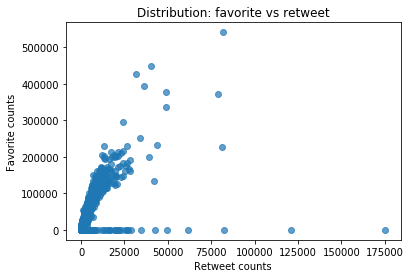

In [83]:
# ploting scatter graph to show the relationship between retweet and favorite number 
plt.scatter(x=df2['retweet count'], y=df2['favorite count'], alpha =0.7)
plt.xlabel('Retweet counts')
plt.ylabel('Favorite counts')
plt.title('Distribution: favorite vs retweet');